In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

Generate sinusoidal data.

(-1.05, 1.05)

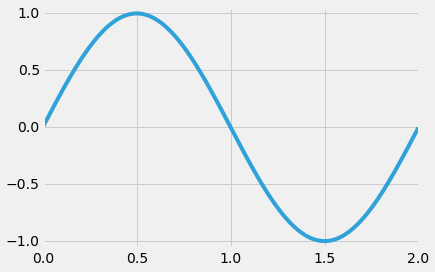

In [2]:
xs = np.arange(0.0, 2.0, 0.001)
ys = np.sin(np.pi * xs)
plt.plot(xs, ys);
plt.ylim(-1.05, 1.05)

In [3]:
from scipy.stats import linregress
from scipy import stats

Choose two points at random from the sinusoidal data and use unregularized linear regression to fit a line with only these 2 points.  Repeat this process 100 times and plot the results.

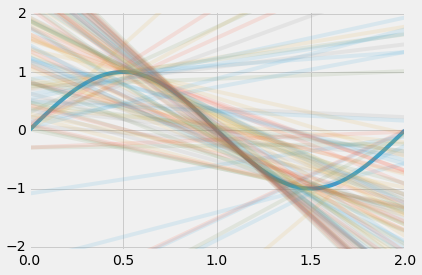

In [22]:
trials = 100
b_s = []
plt.plot(xs, ys);
plt.ylim(-2.05, 2.05)
slopes = []
intercepts = []
for t in range(trials):
    indices = np.random.randint(low = 0, high = len(xs), size=2)
    rand_x = xs[indices]
    rand_y = ys[indices]
    slope, intercept, r_val, pval, std_err = linregress(rand_x, rand_y)
    slopes.append(slope)
    intercepts.append(intercept)
    fitted_y = xs * slope + intercept
    plt.plot(xs, fitted_y, alpha = 0.12);

In [6]:
from sklearn.linear_model import Ridge

Same selection of two random points from the data as above but use regularized regression instead.

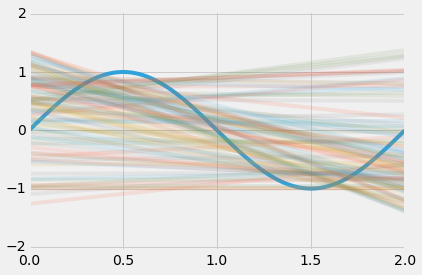

In [25]:
trials = 100
b_s = []
plt.plot(xs, ys);
plt.ylim(-2.05, 2.05)
for t in range(trials):
    indices = np.random.randint(low = 0, high = len(xs), size=2)
    rand_x = np.matrix(xs[indices]).reshape((2, 1))
    rand_y = np.matrix(ys[indices]).reshape((2, 1))
    rReg = Ridge(alpha=0.25)
    rReg.fit(rand_x, rand_y)
    slope = rReg.coef_[0][0]
    intercept = rReg.intercept_[0]
    fitted_y = xs * slope + intercept
    plt.plot(xs, fitted_y, alpha = 0.12);

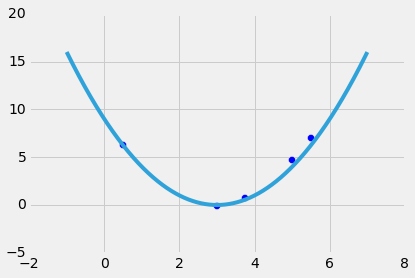

In [81]:
xs = [0.5, 3.0, 3.75, 5.0, 5.5]
ys = [(x - 3)**2 + np.random.normal() for x in xs]
us = np.arange(-1, 7.0, 0.001)
Y_us = (us - 3)**2
plt.scatter(xs, ys, s=50);
plt.plot(us, Y_us)

In [74]:
def regFit(Xs, Ys, power, lamb):
    plt.figure(figsize=(8, 8))
    plt.scatter(Xs, Ys, s=50);
    rReg = Ridge(alpha=lamb)
    xpow1 = np.matrix(Xs).reshape((len(Xs), 1))
    for p in range(2, power + 1):
        Xs = np.column_stack((Xs, np.power(xpow1, p)))
    Ys = np.matrix(Ys).reshape((len(Ys), 1))
    rReg.fit(Xs, Ys)
    xspow1 = np.matrix(np.arange(0, 6.00, 0.001)).reshape((6000, 1))
    xs = np.copy(xspow1)
    for p in range(2, power + 1):
        xs = np.column_stack((xs, np.power(xspow1, p)))
    ys = rReg.predict(xs)
    plt.plot(us, Y_us, label="Actual");
    plt.plot(xspow1, ys, label="Fitted");
    plt.legend();

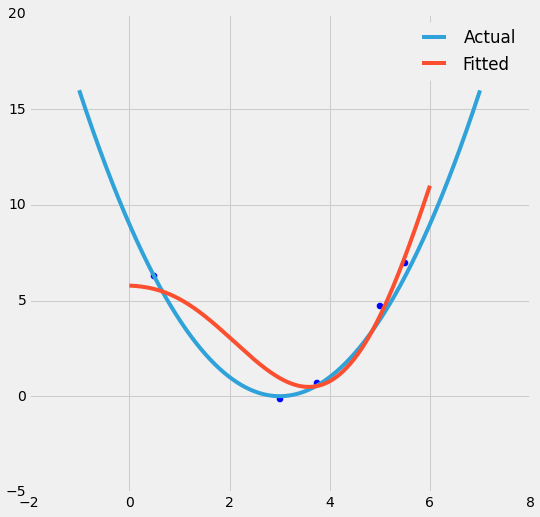

In [83]:
regFit(xs, ys, 5, 10.0)

6000